In [28]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
movie_titles = pd.read_csv('netflix/netflix_titles.csv')
movie_titles

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


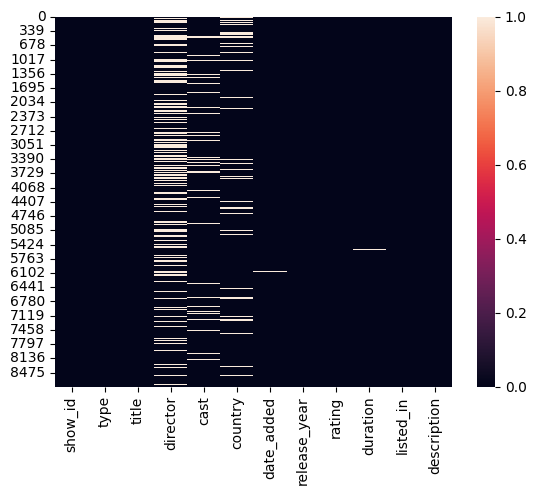

In [9]:
sns.heatmap(movie_titles.isna());

In [52]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(movie_titles['description'])
vectorizer.get_feature_names_out()


array(['000', '007', '009', ..., 'łukasz', 'ōarai', 'şeref'], dtype=object)

In [54]:
movie_titles['description']

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

In [55]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
cosine_sim = pd.DataFrame(cosine_similarity(X, X))
cosine_sim

,0,1,2,3,4,5,6,7,8,9,...,8797,8798,8799,8800,8801,8802,8803,8804,8805,8806
0,1.000000,0.012651,0.039596,0.017049,0.040525,0.017831,0.011060,0.031080,0.061742,0.035088,...,0.021788,0.005473,0.024716,0.010028,0.012204,0.012022,0.009775,0.014858,0.022582,0.055909
1,0.012651,1.000000,0.003296,0.028921,0.003157,0.033126,0.047475,0.011930,0.000000,0.045649,...,0.044049,0.027868,0.098499,0.003059,0.030757,0.000000,0.034004,0.003326,0.000000,0.000000
2,0.039596,0.003296,1.000000,0.005916,0.026704,0.016238,0.017371,0.012646,0.007838,0.013861,...,0.011269,0.022461,0.029741,0.009268,0.007129,0.011204,0.004815,0.014237,0.014935,0.093222
3,0.017049,0.028921,0.005916,1.000000,0.006852,0.007749,0.005146,0.030430,0.018232,0.003066,...,0.010446,0.005162,0.019331,0.006639,0.005118,0.026726,0.004902,0.007219,0.019374,0.008968
4,0.040525,0.003157,0.026704,0.006852,1.000000,0.012622,0.024112,0.025116,0.016031,0.025135,...,0.010795,0.000000,0.012491,0.023941,0.006830,0.012113,0.009849,0.056794,0.075489,0.044907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0.012022,0.000000,0.011204,0.026726,0.012113,0.007199,0.005999,0.033701,0.017495,0.003574,...,0.008348,0.043818,0.062949,0.007738,0.004090,1.000000,0.010748,0.069790,0.004032,0.008331
8803,0.009775,0.034004,0.004815,0.004902,0.009849,0.054818,0.000000,0.014118,0.019558,0.009743,...,0.009332,0.033485,0.011083,0.005073,0.037767,0.010748,1.000000,0.019865,0.004508,0.034389
8804,0.014858,0.003326,0.014237,0.007219,0.056794,0.013299,0.011741,0.026462,0.016891,0.106682,...,0.011374,0.000000,0.013161,0.045312,0.007196,0.069790,0.019865,1.000000,0.025660,0.008044
8805,0.022582,0.000000,0.014935,0.019374,0.075489,0.006192,0.000000,0.013604,0.012689,0.014788,...,0.012928,0.011937,0.010224,0.000000,0.006334,0.004032,0.004508,0.025660,1.000000,0.007166


In [57]:
movie_titles.iloc[0]

show_id                                                        s1
type                                                        Movie
title                                        Dick Johnson Is Dead
director                                          Kirsten Johnson
cast                                                          NaN
country                                             United States
date_added                                     September 25, 2021
release_year                                                 2020
rating                                                      PG-13
duration                                                   90 min
listed_in                                           Documentaries
description     As her father nears the end of his life, filmm...
Name: 0, dtype: object

In [58]:
movie_titles.iloc[1066]

show_id                                                     s1067
type                                                        Movie
title                                                    The Soul
director                                            Cheng Wei-hao
cast            Chang Chen, Janine Chang, Christopher Lee, Ank...
country                                             China, Taiwan
date_added                                         April 14, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                  130 min
listed_in                 Dramas, International Movies, Thrillers
description     While investigating the death of a businessman...
Name: 1066, dtype: object

In [59]:
cosine_sim[0].sort_values(ascending=False)

0       1.000000
1066    0.168948
4877    0.152960
7506    0.150446
8200    0.148731
          ...   
3357    0.000000
8358    0.000000
1702    0.000000
7588    0.000000
7132    0.000000
Name: 0, Length: 8807, dtype: float64

In [60]:
movie_titles.iloc[0]['description']

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [61]:
movie_titles.iloc[1066]['description']

'While investigating the death of a businessman, a prosecutor and his wife uncover occult secrets as they face their own life-and-death dilemma.'

In [87]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack


# 1. Векторизация текстов (описаний фильмов) с использованием TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie_titles['description'])

tfidf2 = TfidfVectorizer(stop_words='english')
tfidf_matrix2 = tfidf2.fit_transform(movie_titles['listed_in'])

# 2. Преобразование категориальных признаков (жанр и тип) с помощью One-Hot Encoding
encoder = OneHotEncoder()
genre_type_encoded = encoder.fit_transform(movie_titles[['rating', 'type']])

# 3. Нормализация числовых данных (год выпуска)
scaler = StandardScaler()
year_scaled = scaler.fit_transform(movie_titles[['release_year']])

# 4. Объединение всех признаков (TF-IDF, жанр, тип, год)
combined_features = hstack([tfidf_matrix, year_scaled, tfidf_matrix2])

# 5. Вычисление косинусного сходства между фильмами по всем признакам
cosine_sim = cosine_similarity(combined_features, combined_features)

# Функция для получения рекомендаций на основе названия фильма
def get_recommendations(title, cosine_sim=cosine_sim):
    # Получаем индекс фильма по названию
    idx = movie_titles.index[movie_titles['title'] == title][0]

    # Получаем список фильмов по их сходству с текущим
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Сортируем фильмы по уровню сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Выбираем топ-5 фильмов
    sim_scores = sim_scores[1:6]

    # Получаем индексы рекомендованных фильмов
    movie_indices = [i[0] for i in sim_scores]

    # Возвращаем названия рекомендованных фильмов
    return movie_titles['title'].iloc[movie_indices]


In [88]:
# Пример использования функции для рекомендаций
recommended_movies = get_recommendations('Dick Johnson Is Dead')
print("Рекомендованные фильмы:")
print(recommended_movies)


Рекомендованные фильмы:
1171                       Seaspiracy
4877                         End Game
404     9to5: The Story of a Movement
1960                  Kiss the Ground
870        Amy Tan: Unintended Memoir
Name: title, dtype: object


In [89]:
res = pd.DataFrame(cosine_sim)
res

,0,1,2,3,4,5,6,7,8,9,...,8797,8798,8799,8800,8801,8802,8803,8804,8805,8806
0,1.000000,0.202882,0.202882,0.202882,0.208933,0.202882,0.202882,-0.364387,0.218849,0.209803,...,0.061056,-0.006109,-0.162205,-0.072818,0.027736,-0.210985,0.123837,-0.162205,-0.226094,0.027736
1,0.202882,1.000000,0.469032,0.323850,0.493514,0.573035,0.250070,-0.382635,0.411517,0.283615,...,0.235660,0.092129,-0.038977,0.235279,0.115005,-0.216216,0.389202,-0.184035,-0.263135,0.081429
2,0.202882,0.469032,1.000000,0.314337,0.518565,0.398769,0.230186,-0.401429,0.423003,0.230186,...,0.204981,0.026065,-0.145972,0.243900,0.058457,-0.239380,0.375176,-0.184035,-0.263135,0.060699
3,0.202882,0.323850,0.314337,1.000000,0.322962,0.320706,0.230186,-0.413428,0.449366,0.230186,...,0.142141,-0.006931,-0.184035,0.022428,0.031469,-0.239380,0.237448,-0.184035,-0.257124,0.031469
4,0.208933,0.493514,0.518565,0.322962,1.000000,0.416049,0.230186,-0.400199,0.442768,0.309320,...,0.218892,0.094696,-0.142071,0.326329,0.061223,-0.239380,0.424024,-0.121748,-0.201311,0.052932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,-0.210985,-0.216216,-0.239380,-0.239380,-0.239380,-0.216993,-0.211508,0.484430,-0.239380,-0.169077,...,-0.072040,0.133558,0.335061,0.111897,0.221776,1.000000,-0.146115,0.247527,0.297970,0.030091
8803,0.123837,0.389202,0.375176,0.237448,0.424024,0.357754,0.140503,-0.252351,0.328184,0.216469,...,0.363624,0.081715,-0.112333,0.242517,0.036842,-0.146115,1.000000,-0.062147,-0.122378,0.019209
8804,-0.162205,-0.184035,-0.184035,-0.184035,-0.121748,-0.048802,-0.141564,0.378605,-0.184035,-0.011628,...,-0.055384,0.203713,0.223379,0.085217,0.028898,0.247527,-0.062147,1.000000,0.321514,0.013834
8805,-0.226094,-0.263135,-0.263135,-0.257124,-0.201311,-0.263135,0.072784,0.509229,-0.263135,-0.144818,...,-0.079189,0.158910,0.268467,0.094444,0.005213,0.297970,-0.122378,0.321514,1.000000,-0.006265


In [95]:
res[1].sort_values(ascending=False)

1       1.000000
225     0.629586
516     0.615093
699     0.615093
703     0.615093
          ...   
8739   -0.472578
8763   -0.472578
8660   -0.472578
7790   -0.472772
8205   -0.472772
Name: 1, Length: 8807, dtype: float64

In [96]:
movie_titles.iloc[225]

show_id                                                      s226
type                                                      TV Show
title                                              Open Your Eyes
director                                                      NaN
cast            Maria Wawreniuk, Ignacy Liss, Michał Sikorski,...
country                                                       NaN
date_added                                        August 25, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                 1 Season
listed_in         International TV Shows, TV Dramas, TV Mysteries
description     After a tragic accident, an amnesiac teen trie...
Name: 225, dtype: object

In [97]:
movie_titles.iloc[1]

show_id                                                        s2
type                                                      TV Show
title                                               Blood & Water
director                                                      NaN
cast            Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
country                                              South Africa
date_added                                     September 24, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                2 Seasons
listed_in         International TV Shows, TV Dramas, TV Mysteries
description     After crossing paths at a party, a Cape Town t...
Name: 1, dtype: object

In [98]:
movie_titles.iloc[225]['description']

'After a tragic accident, an amnesiac teen tries to rebuild her life at a memory disorders center but becomes suspicious of her unconventional treatment.'

In [99]:
movie_titles.iloc[1]['description']

'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'